<a href="https://colab.research.google.com/github/auliafsyafira/Machine_Learning/blob/main/Jobsheet%209/Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import Library**

In [15]:
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Kode ini mengimpor beberapa library yang digunakan dalam deep learning, terutama untuk pelatihan model neural network pada dataset MNIST.

- import tensorflow as tf: Mengimpor TensorFlow untuk membangun dan melatih model deep learning.
- from keras.datasets import mnist: Mengimpor dataset MNIST, berisi gambar angka 0-9 untuk klasifikasi.
- from tensorflow.keras.utils import to_categorical: Mengonversi label kelas ke format one-hot encoding.
- import numpy as np: Mengimpor Numpy untuk manipulasi array dan operasi numerik.
- import matplotlib.pyplot as plt: Mengimpor Matplotlib untuk visualisasi data.
- from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay: Mengimpor fungsi untuk menghitung dan menampilkan confusion matrix untuk evaluasi model klasifikasi.

## **2. Memuat Dataset**

In [2]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


- mnist.load_data(): Fungsi ini memuat dataset MNIST yang terdiri dari gambar angka (0-9). Dataset ini terbagi menjadi dua bagian: data pelatihan (training) dan data pengujian (testing).
- y_train: Array yang berisi label (angka) untuk gambar pelatihan.
- y_test: Array yang berisi label untuk gambar pengujian.

In [3]:
X_train.shape
y_train.shape

(60000,)

In [4]:
X_test.shape
y_test.shape

(10000,)

## **3. Pra-Pengolahan Data**

In [5]:
# Normalisasi Pixel
X_train = X_train / 255.0
X_test = X_test / 255.0

Langkah ini dilakukan untuk mengubah nilai piksel gambar, yang awalnya berkisar antara 0 hingga 255 (nilai intensitas warna pada gambar grayscale), menjadi rentang 0 hingga 1

In [6]:
# Ubah array jadi 1 dimensi
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

Langkah ini mengubah bentuk array gambar dari dua dimensi (28x28 piksel) menjadi satu dimensi (784 piksel).
- reshape(-1, 28 * 28):
    - -1 memberitahu Numpy untuk menghitung ukuran yang tepat dari dimensi pertama secara otomatis berdasarkan ukuran total array.
    - 28 * 28 mengubah setiap gambar dari bentuk (28, 28) menjadi (784,) untuk digunakan dalam model yang biasanya membutuhkan input 1 dimensi, seperti model Neural Network yang menggunakan lapisan Dense.

In [7]:
# One hot encoding untuk label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Langkah ini mengubah label kelas (angka 0-9) menjadi format one-hot encoding, yang merupakan representasi biner dari kelas-kelas tersebut.
- Misalnya, label 3 akan diubah menjadi [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], di mana 1 menunjukkan kelas yang benar dan 0 menunjukkan kelas yang salah.
- Fungsi to_categorical(y_train, 10) mengonversi label pelatihan y_train menjadi format one-hot, dengan 10 menunjukkan jumlah kelas yang ada (angka 0 hingga 9).

## **4. Pembangunan Model untuk ANN**

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# model ANN
model = Sequential()

# Input layer dan Hidden layer 1
model.add(Dense(128, activation='relu', input_shape=(784,)))

# Hidden layer 2
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- Impor Library: Mengimpor Sequential untuk membuat model dan Dense untuk menambahkan lapisan ke dalam model.

- Input Layer dan Hidden Layer 1:
   - Menambahkan lapisan input dengan 128 neuron dan fungsi aktivasi **ReLU** (Rectified Linear Unit).
   - input_shape=(784,) menunjukkan bahwa input adalah vektor satu dimensi dengan 784 elemen (setiap gambar yang telah di-flatten).

- Hidden Layer 2: Menambahkan lapisan tersembunyi kedua dengan 64 neuron, juga menggunakan fungsi aktivasi ReLU.

- Output Layer: Menambahkan lapisan output dengan 10 neuron (satu untuk setiap kelas) menggunakan fungsi aktivasi softmax, yang mengubah output menjadi probabilitas untuk masing-masing kelas.

- Kompilasi Model: Mengonfigurasi model untuk pelatihan dengan:
   - Optimizer: adam, yang merupakan algoritma optimisasi yang populer dan efisien.
   - Loss Function: categorical_crossentropy, yang digunakan untuk mengukur kesalahan model dalam klasifikasi multi-kelas.
   - Metrics: accuracy, yang digunakan untuk mengevaluasi kinerja model.

## **5. Pelatihan Model**

In [9]:
# Latih model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8788 - loss: 0.4193 - val_accuracy: 0.9637 - val_loss: 0.1158
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9681 - loss: 0.1049 - val_accuracy: 0.9709 - val_loss: 0.0970
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9774 - loss: 0.0715 - val_accuracy: 0.9744 - val_loss: 0.0831
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9823 - loss: 0.0533 - val_accuracy: 0.9697 - val_loss: 0.0964
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9876 - loss: 0.0407 - val_accuracy: 0.9741 - val_loss: 0.0870
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9897 - loss: 0.0323 - val_accuracy: 0.9768 - val_loss: 0.0779
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9912 - loss: 0.0267 - val_accuracy: 0.9773 - val_loss: 0.0831
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9928 - loss: 0.0227 

- model.fit(): Fungsi ini digunakan untuk melatih model menggunakan data pelatihan (X_train dan y_train).
   
- Parameter:
   - epochs=10: Menentukan jumlah iterasi lengkap (epoch) di mana model akan dilatih pada seluruh dataset. Di sini, model akan dilatih selama 10 epoch.
   - batch_size=32: Menentukan jumlah sampel yang akan diproses sebelum model diperbarui. Dengan batch size 32, model akan memperbarui bobotnya setiap 32 sampel.
   - validation_data=(X_test, y_test): Menyediakan data validasi (data pengujian) untuk mengevaluasi kinerja model setelah setiap epoch.


## **6. Evaluasi Model**

In [10]:
# Hitung Akurasi
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9798


Langkah ini digunakan untuk mengevaluasi kinerja model pada data pengujian (X_test dan y_test).

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


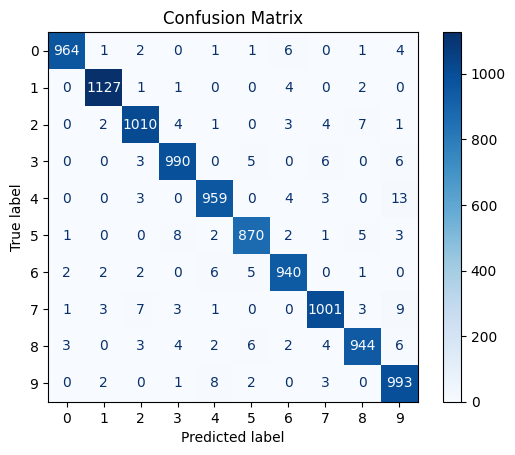

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prediksi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Kelas dengan probabilitas tertinggi
y_true = np.argmax(y_test, axis=1)  # Kelas sebenarnya

# Hitung dan tampilkan confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Tampilkan confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Confusion matrix dibuat untuk mengidentifikasi jumlah prediksi yang benar dan salah untuk setiap digit. Dalam confusion matrix, baris menunjukkan label aktual, sedangkan kolom menggambarkan label yang diprediksi.

# **Hasil:**
### **Akurasi**
Hasil akurasi Test Accuracy: 0.9798 menunjukkan bahwa model dapat mengklasifikasikan sekitar 97.98% dari data pengujian dengan benar. Ini menunjukkan bahwa model tersebut mampu mengenali pola dalam data dengan sangat baik.

### **Confusion Matrix**
Confusion matrix menunjukkan bahwa model memiliki akurasi tinggi, dengan sebagian besar prediksi berada di diagonal utama. Misalnya, kelas 0 memiliki 964 instance yang benar diklasifikasikan, dan hanya beberapa yang salah diklasifikasikan. Kelas 0, 1, dan 3 memiliki performa terbaik, sementara kelas 5 dan 6 menunjukkan beberapa kesalahan klasifikasi yang lebih tinggi. Kesalahan umum terjadi antara kelas 5 dan 8, serta kelas 8 dan 9. Perbaikan diperlukan terutama untuk kelas 5 dan 6.
